In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reading File

In [2]:
df = pd.read_csv('development_dataset.csv')
df.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,...,100.083403,1.0,1,1.0,1.540594,NaN,1,0,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,...,15.012510,NaN,1,NaN,1.614613,NaN,0,1,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,...,210.175146,10.0,1,10.0,1.044599,NaN,0,0,98.249570,Medium
3,4,892.941176,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,...,NaN,NaN,1,NaN,1.145729,NaN,1,0,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,...,210.175146,NaN,.,NaN,1.558341,NaN,1,0,101.268503,High


# 2. Splitting into Training and Validation datasets

In [3]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size = 0.2, random_state = 51)

print("Training dataset shape: ", train.shape)
print("Validation dataset shape: ", val.shape)

Training dataset shape:  (27200, 21)
Validation dataset shape:  (6800, 21)


# 3. Exploration

## > Basic exploration

In [4]:
train.dtypes

VAR1       int64
VAR2     float64
VAR3     float64
VAR4     float64
VAR5     float64
VAR6     float64
VAR7     float64
VAR8     float64
VAR9     float64
VAR10    float64
VAR11    float64
VAR12    float64
VAR13    float64
VAR14     object
VAR15    float64
VAR16    float64
VAR17    float64
VAR18      int64
VAR19      int64
VAR20    float64
VAR21     object
dtype: object

### >> Fixing VAR14

In [4]:
#########################
train['VAR14'].replace('.', np.nan, inplace = True)
train['VAR14'] = pd.to_numeric(train['VAR14'])

C:\Ana\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-4-85bf1e6cfbe3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['VAR14'] = pd.to_numeric(train['VAR14'])


In [12]:
train.describe()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20
count,27200.000000,26416.000000,24483.000000,17218.000000,27200.000000,24430.000000,26522.000000,26522.000000,14508.000000,23541.000000,21121.000000,18845.000000,20353.000000,26988.000000,20744.000000,26496.000000,9420.000000,27200.000000,27200.000000,27200.000000
mean,17042.631691,917.316421,1.109051,248.560974,631.503968,15.147435,2.061099,199.982683,54.013625,56.507853,5.437529,117.317540,11.719771,1.537313,12.478858,2.096109,820.374479,0.396176,0.297353,160.984716
std,9805.372231,50.288291,12.356952,241.575364,30.947649,27.963579,9.230384,11.306299,84.723288,7.383809,11.738754,120.809953,11.366888,1.178094,12.372325,8.441145,262.512932,0.675932,0.457102,122.969195
min,1.000000,731.764706,0.001333,18.928571,347.053355,0.005000,0.353228,0.000000,0.004278,13.028620,0.000693,0.834028,0.082667,0.000000,0.133333,0.959315,0.130000,0.000000,0.000000,0.000000
25%,8552.750000,882.352941,0.083333,71.428571,611.693793,6.636364,0.691413,197.196949,8.780335,57.475545,0.643090,15.012510,5.666667,1.000000,6.666667,1.039346,729.160000,0.000000,0.000000,104.359725
50%,17096.500000,924.705882,0.166667,142.857143,619.680362,10.000000,0.998297,197.905943,22.086661,58.632548,2.102517,80.066722,10.000000,1.000000,10.000000,1.261607,963.890000,0.000000,0.000000,117.370052
75%,25506.250000,956.470588,0.555556,357.142857,637.129317,18.181818,1.733518,199.667772,58.306347,58.632548,6.038674,190.158465,15.333333,2.000000,16.542833,1.824138,1000.000000,1.000000,1.000000,159.191911
max,34000.000000,1000.000000,1000.000000,1000.000000,1000.000000,909.090818,681.582083,1000.000000,993.061289,1000.000000,824.334457,1000.000000,775.000000,104.000000,775.000000,1000.000000,1000.000000,12.000000,1.000000,1000.000000


**VAR3, VAR7, VAR11, VAR11, VAR13, VAR16 seem to have outliers due to large difference between the 75% quantile and max values.**

### >> Null values exploration

In [7]:
# Percentage Missing values
(train.isnull().sum()/train.shape[0])*100

VAR1      0.000000
VAR2      2.882353
VAR3      9.988971
VAR4     36.698529
VAR5      0.000000
VAR6     10.183824
VAR7      2.492647
VAR8      2.492647
VAR9     46.661765
VAR10    13.452206
VAR11    22.349265
VAR12    30.716912
VAR13    25.172794
VAR14     0.779412
VAR15    23.735294
VAR16     2.588235
VAR17    65.367647
VAR18     0.000000
VAR19     0.000000
VAR20     0.000000
VAR21     0.000000
dtype: float64

**Lets drop VAR17 and VAR9 due large number of missing values (i.e., >45%)**

In [5]:
################
train.drop(columns = ["VAR9", "VAR17"], axis=1, inplace = True)

C:\Ana\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


###  >> Setting VAR1 as index because it represents the ID

In [6]:
#################
train.set_index('VAR1', inplace=True)

## > Univariate Exploration

In [7]:
# separating the types of features

categorical_features = ["VAR19", "VAR21"]
discrete_features = ["VAR12", "VAR14", "VAR18"]
numerical_features = []
for col in train.columns:
    if (col not in categorical_features) & (col not in discrete_features):
        numerical_features.append(str(col))

<Figure size 2880x3600 with 0 Axes>

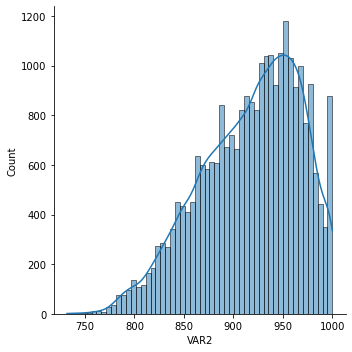

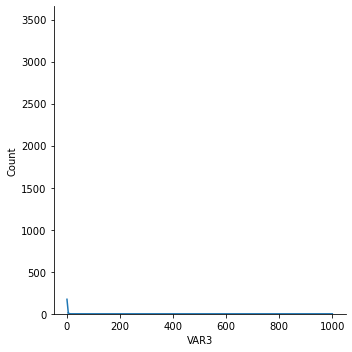

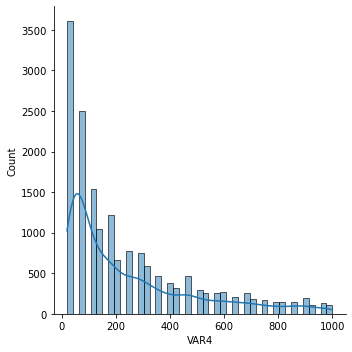

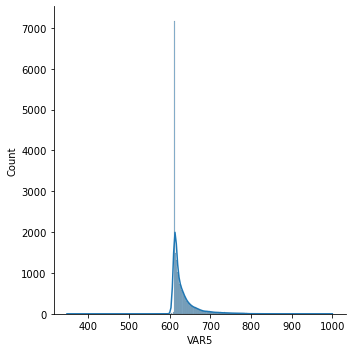

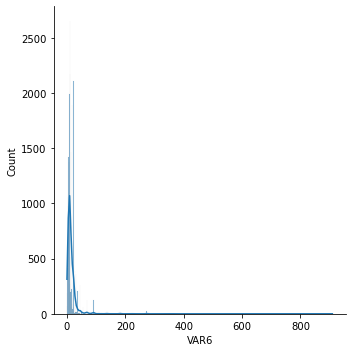

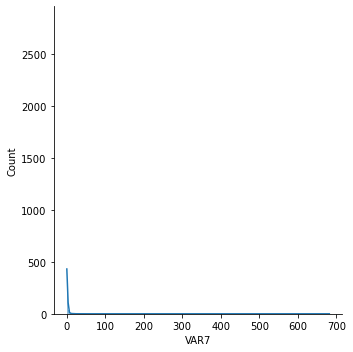

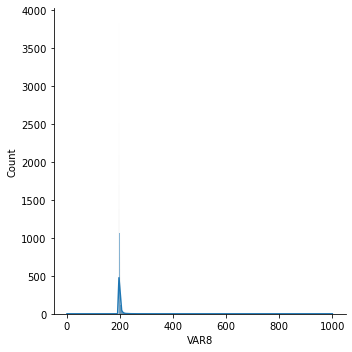

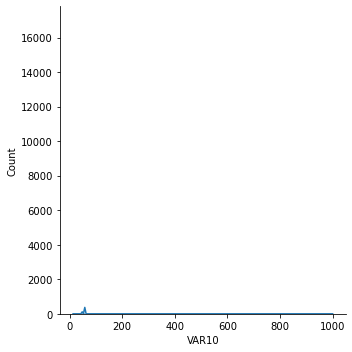

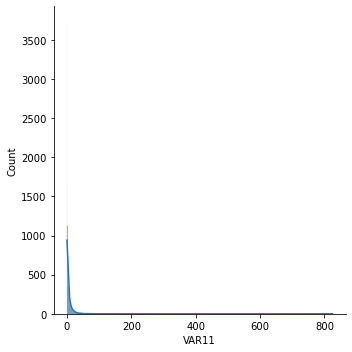

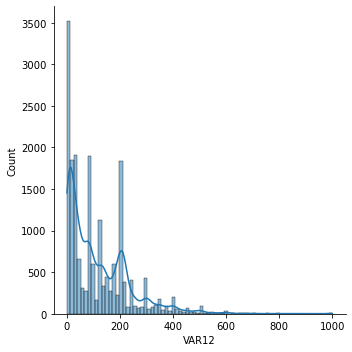

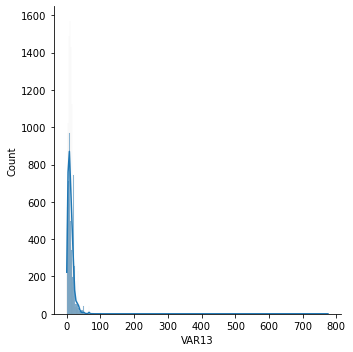

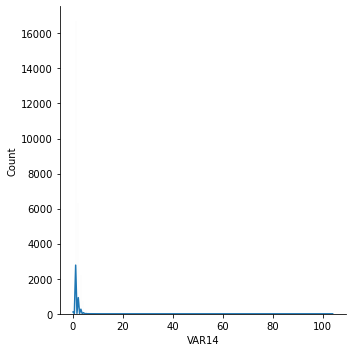

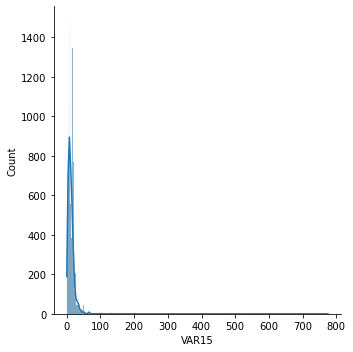

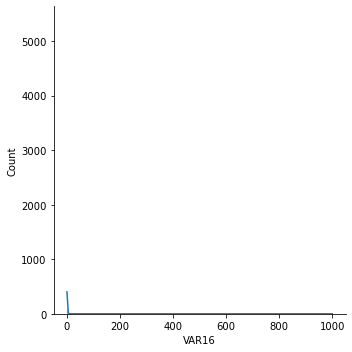

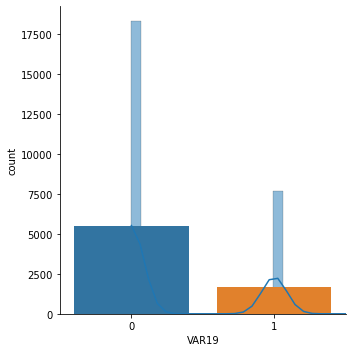

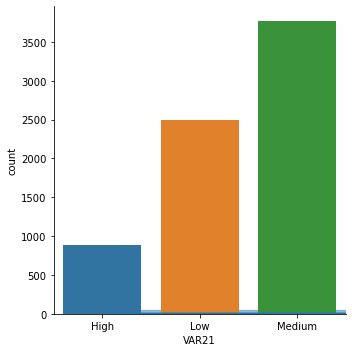

In [11]:
# Univariate Distributions
fig = plt.figure(figsize=(40,50))
for i, col in enumerate(train.columns):
    if col not in categorical_features:
        sns.displot(data = train[col].dropna(), kde=True)
    else:
        sns.countplot(data = train.dropna(), x=col)

### Observations
- VAR21 plot shows that the dataset is highly imbalanced.
- Most of the variables are right-skewed.
- VAR3, VAR6, VAR7, VAR16 are highly right-skewed.

## > Bivariate Exploration

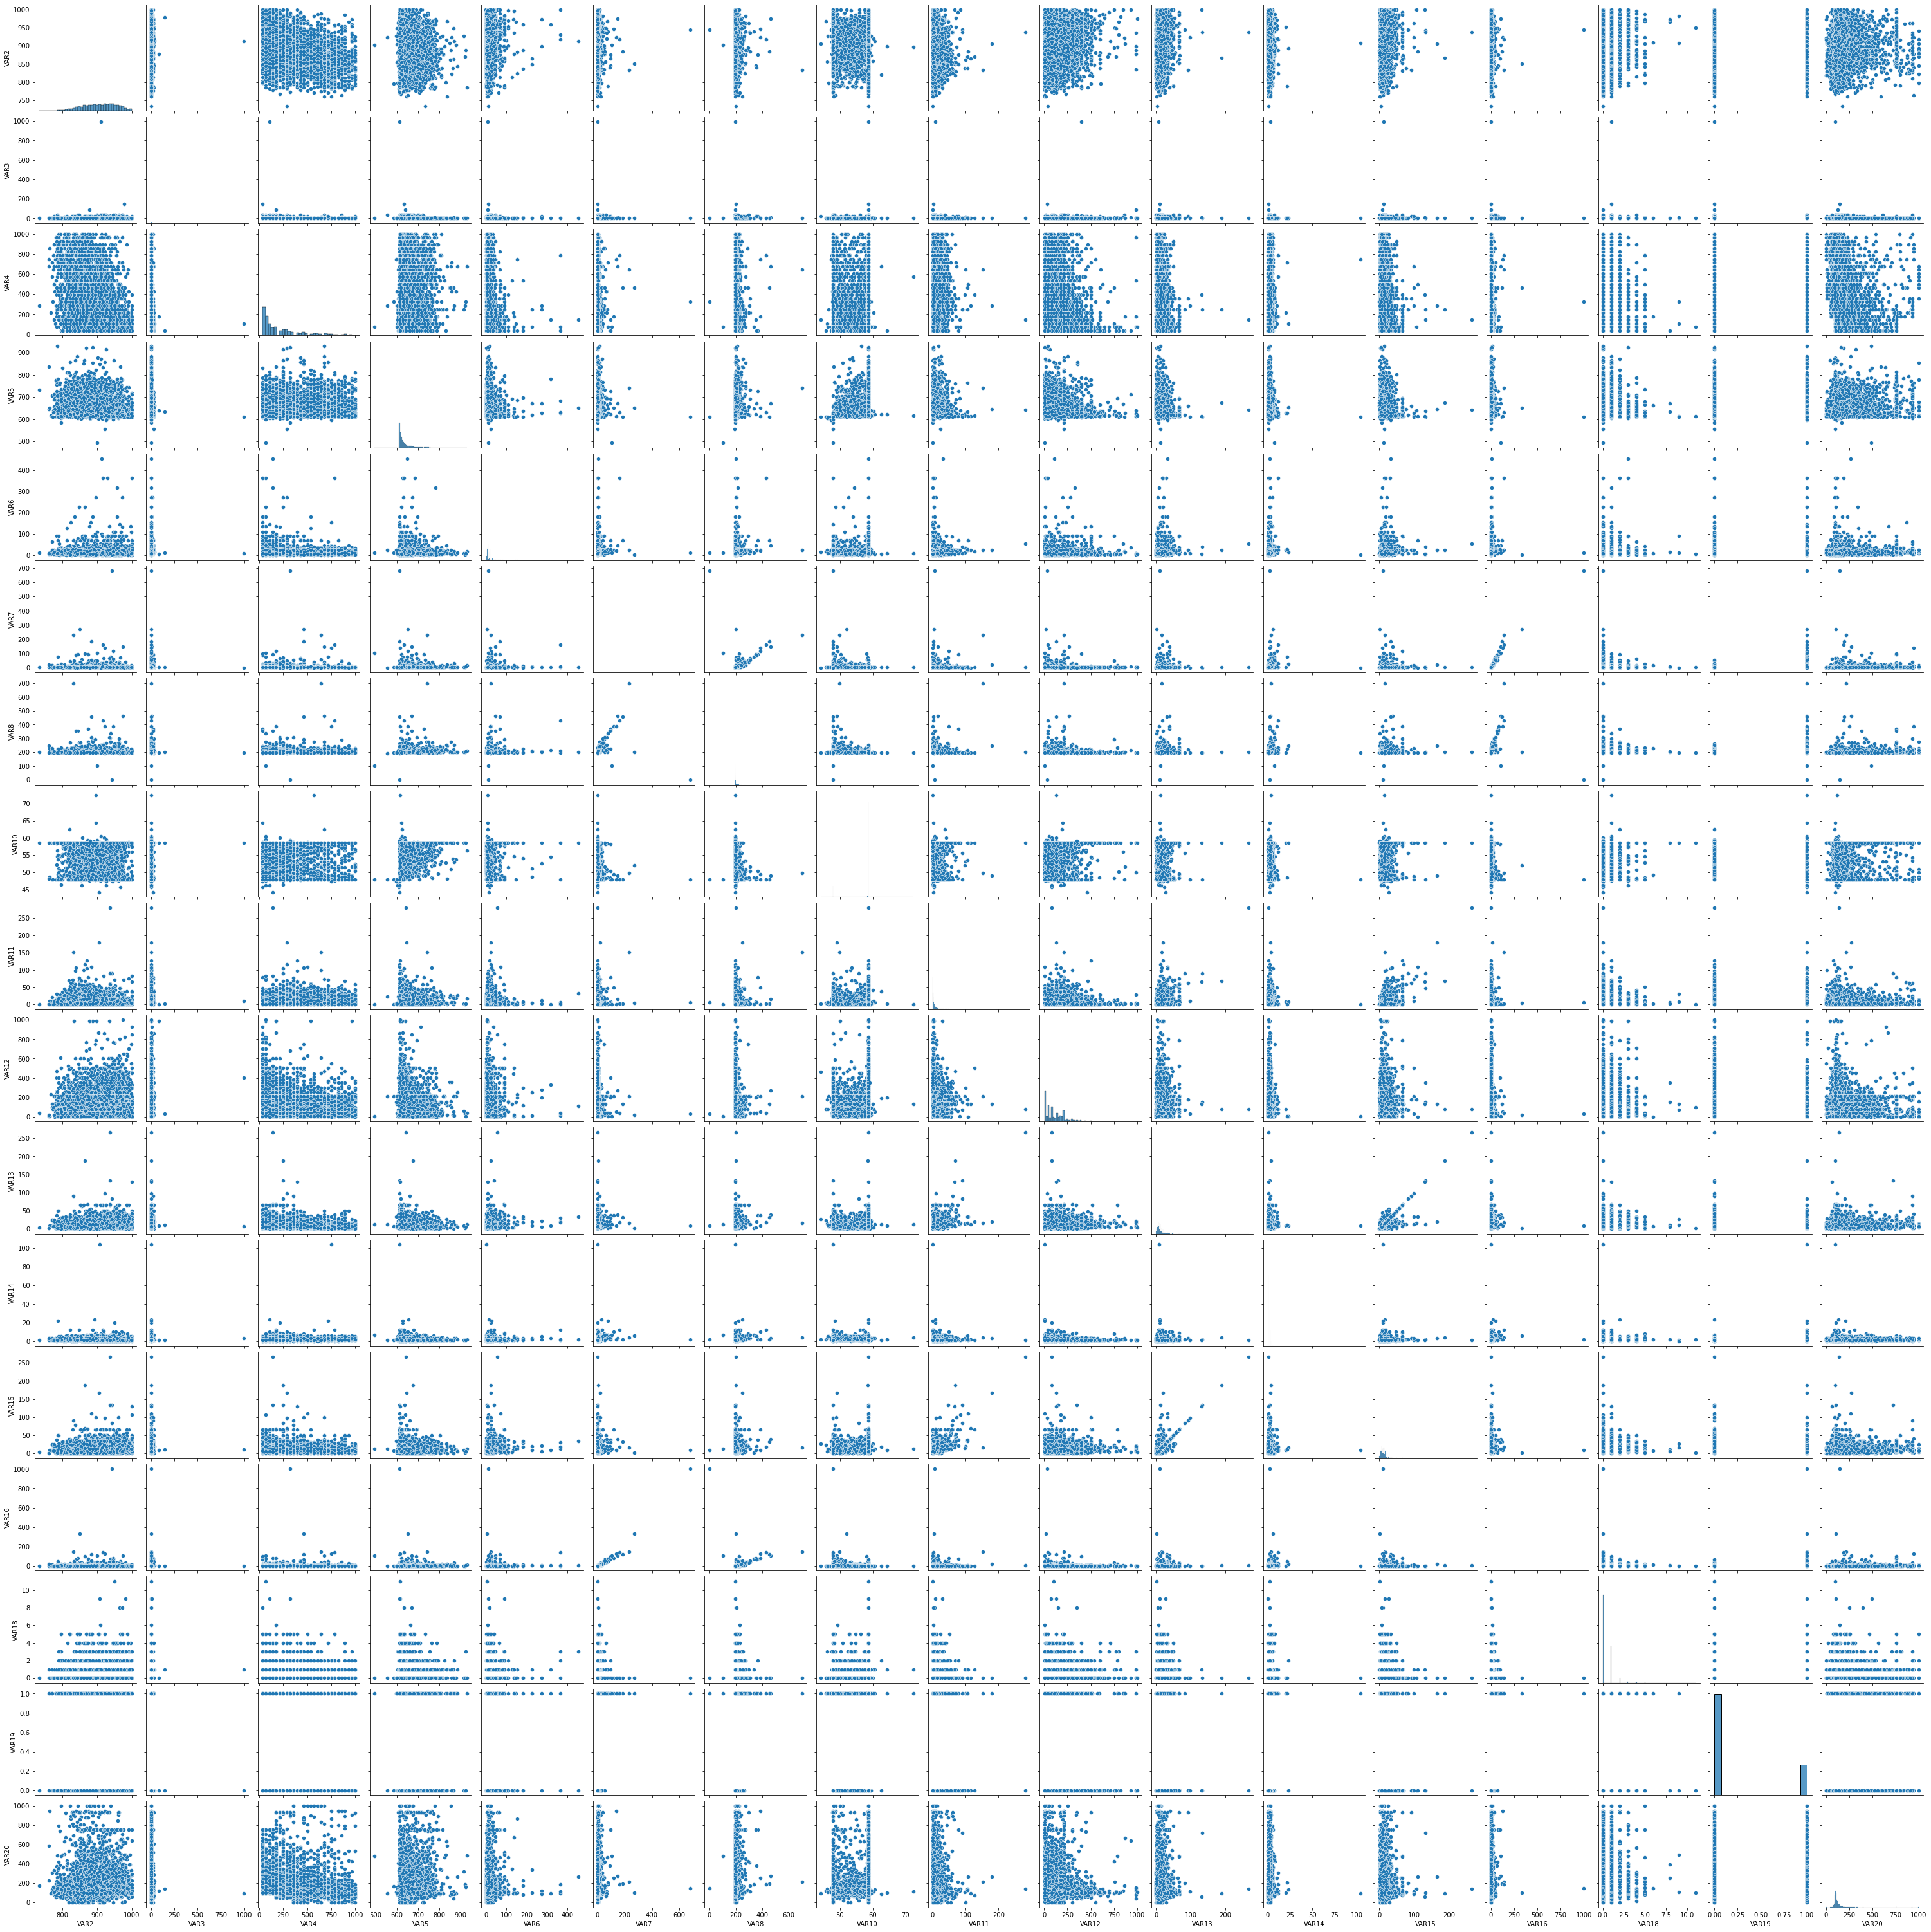

In [18]:
sns.pairplot(train.dropna())

### Observations
- There seems to be some outliers in VAR3, VAR5, VAR7, VAR8, VAR11, VAR13, VAR14 and VAR16
- VAR7, VAR8, VAR16 exhibits some linear relationship
- VAR13 and VAR15 also has a linear relationship

### >>Handling outliers

In [39]:
train[train.VAR3>750]

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR18,VAR19,VAR20,VAR21
VAR1,,,,,,,,,,,,,,,,,,
25815,970.588235,1000.000000,NaN,612.357298,8.363636,0.661377,196.990082,58.632548,1.787902,NaN,13.066667,1.0,13.066667,1.035685,0,0,154.648881,Medium
6368,814.117647,833.333333,500.000000,620.487422,NaN,0.734258,197.509163,58.632548,0.600818,430.358632,2.000000,2.0,2.000000,1.013195,0,0,77.523236,Medium
25436,911.764706,993.333333,107.142857,611.618514,9.090909,0.562338,196.916682,58.632548,8.717755,400.333611,6.666667,3.0,11.666667,0.959315,1,0,96.041308,Medium


In [53]:
train[train.VAR5<500]

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR18,VAR19,VAR20,VAR21
VAR1,,,,,,,,,,,,,,,,,,
30421,901.176471,0.833333,71.428571,493.425349,11.363636,102.229060,103.554408,47.899686,0.967408,5.004170,12.933333,7.0,12.933333,107.656847,0,1,482.920826,High
14588,885.882353,1.165367,NaN,347.053355,31.818182,52.228776,156.320348,47.899686,NaN,20.016681,NaN,1.0,NaN,37.196697,1,0,332.432014,Medium


In [40]:
train[train.VAR7>500]

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR18,VAR19,VAR20,VAR21
VAR1,,,,,,,,,,,,,,,,,,
29583,836.470588,4.166667,NaN,644.462885,22.727273,649.324982,412.897858,48.057459,0.065834,155.129274,2.8,3.0,2.8,420.464217,0,1,756.626506,High
30400,917.647059,0.111111,285.714286,631.327588,181.818182,536.490229,1000.000000,47.989842,35.320769,NaN,40.0,3.0,40.0,195.246898,1,1,146.865749,Low
32847,943.529412,5.555556,321.428571,611.574748,11.363636,681.582083,0.000000,47.899686,5.112153,31.693078,10.0,2.0,10.0,1000.000000,0,1,148.583477,Low


In [51]:
train[(train.VAR8>700) | (train.VAR8<10)]

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR18,VAR19,VAR20,VAR21
VAR1,,,,,,,,,,,,,,,,,,
22726,832.941176,4.166667,642.857143,741.341611,22.727364,231.019527,701.697667,49.807989,151.580145,210.175146,16.666667,4.0,16.666667,142.106911,0,1,212.975904,Low
30400,917.647059,0.111111,285.714286,631.327588,181.818182,536.490229,1000.000000,47.989842,35.320769,NaN,40.000000,3.0,40.000000,195.246898,1,1,146.865749,Low
32847,943.529412,5.555556,321.428571,611.574748,11.363636,681.582083,0.000000,47.899686,5.112153,31.693078,10.000000,2.0,10.000000,1000.000000,0,1,148.583477,Low


In [54]:
train[train.VAR11>350]

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR18,VAR19,VAR20,VAR21
VAR1,,,,,,,,,,,,,,,,,,
3129,811.764706,4.166667,892.857143,611.574748,18.181818,9.422551,237.834110,NaN,824.334457,40.033361,775.0,1.0,775.000000,10.018615,0,1,153.115318,Low
32365,917.647059,0.555556,178.571429,660.401009,9.090909,2.699813,205.219204,58.632548,352.525100,NaN,12.0,2.0,356.666667,1.515336,0,0,130.206540,Low


In [44]:
train[train.VAR14>90]

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR18,VAR19,VAR20,VAR21
VAR1,,,,,,,,,,,,,,,,,,
21258,907.058824,0.027778,750.0,611.574748,2.272727,0.55971,196.911295,47.899686,0.586266,5.00417,9.666667,104.0,9.666667,0.959315,0,1,93.89673,Low


In [45]:
train[train.VAR16>800]

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR18,VAR19,VAR20,VAR21
VAR1,,,,,,,,,,,,,,,,,,
32847,943.529412,5.555556,321.428571,611.574748,11.363636,681.582083,0.0,47.899686,5.112153,31.693078,10.0,2.0,10.0,1000.0,0,1,148.583477,Low


### >>Removing Outliers

In [8]:
######################
train.drop(index = 32847, axis=0, inplace=True) #Common in VAR7, VAR8 and VAR16
train.drop(index = [25436, 25815, 6368], axis=0, inplace=True) #Outliers in VAR3
train.drop(index = 14588, axis=0, inplace=True) #Outlier in VAR5
train.drop(index = 21258, axis=0, inplace=True) #Outlier in VAR14
train.drop(index = [32365, 3129], axis=0, inplace=True) #Outlier in VAR11

## > Checking Correlations

In [63]:
train.corr()

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR18,VAR19,VAR20
VAR2,1.000000,0.012343,-0.521229,-0.198703,0.023593,-0.030825,-0.045050,0.040220,-0.191921,0.144825,0.155622,-0.052797,0.118533,-0.034673,0.068733,-0.062775,-0.100936
VAR3,0.012343,1.000000,-0.019286,0.008011,0.053121,0.042521,0.054855,-0.007569,0.022950,0.132234,0.051129,0.010644,0.043952,0.043680,0.018450,0.021676,0.036692
VAR4,-0.521229,-0.019286,1.000000,0.210961,-0.030800,0.021063,0.065344,-0.029511,0.227101,-0.102104,-0.102542,0.056602,-0.060674,0.024471,-0.038739,0.110761,0.050947
VAR5,-0.198703,0.008011,0.210961,1.000000,0.028648,0.086210,0.201332,0.129686,0.094557,-0.051857,-0.054696,0.033256,-0.039411,0.098995,0.036194,-0.129768,0.229244
VAR6,0.023593,0.053121,-0.030800,0.028648,1.000000,0.108089,0.138958,0.171970,0.065107,0.031522,0.152617,0.056393,0.137131,0.108710,0.053860,0.084933,0.075807
VAR7,-0.030825,0.042521,0.021063,0.086210,0.108089,1.000000,0.806230,-0.029624,0.085837,-0.000328,0.081699,0.180552,0.078580,0.957382,0.026484,0.122796,0.124081
VAR8,-0.045050,0.054855,0.065344,0.201332,0.138958,0.806230,1.000000,-0.064092,0.149082,0.005113,0.107537,0.211815,0.109244,0.741183,0.040426,0.167481,0.164604
VAR10,0.040220,-0.007569,-0.029511,0.129686,0.171970,-0.029624,-0.064092,1.000000,-0.062216,0.031772,-0.020559,-0.089996,-0.031089,-0.023806,0.022178,-0.231547,-0.020185
VAR11,-0.191921,0.022950,0.227101,0.094557,0.065107,0.085837,0.149082,-0.062216,1.000000,0.034595,0.391623,0.064043,0.543403,0.079827,0.024134,0.093534,0.084211
VAR12,0.144825,0.132234,-0.102104,-0.051857,0.031522,-0.000328,0.005113,0.031772,0.034595,1.000000,0.116463,-0.021929,0.109045,-0.003243,0.084144,0.033054,-0.068416


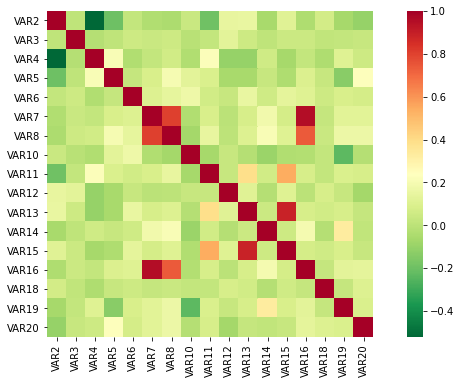

In [68]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), square=True, cmap='RdYlGn_r')
plt.show()

- Correlation between VAR7 and VAR16: 0.96
- Correlation between VAR7 and VAR8: 0.81
- Correlation between VAR8 and VAR16: 0.74

**It is to note that VAR16 is a variable that represents the data of 3 months but in the given dataset, most of the variables represent data from past 6 months.**

### >> Dropping VAR16

In [9]:
###############
train.drop(columns="VAR16", axis=1, inplace=True)

## > Imputing Missing Values

### >> Trying Iterative Imputer

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


iter_imp = IterativeImputer(max_iter=150, initial_strategy='median', random_state=51, min_value=0, max_value=1000)

In [11]:
##############
X_train = train.drop(columns = "VAR21", axis=1)

iter_imp.fit(X_train)

X_train_iter = pd.DataFrame(iter_imp.transform(X_train), index=X_train.index, columns = X_train.columns)

C:\Ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Futu

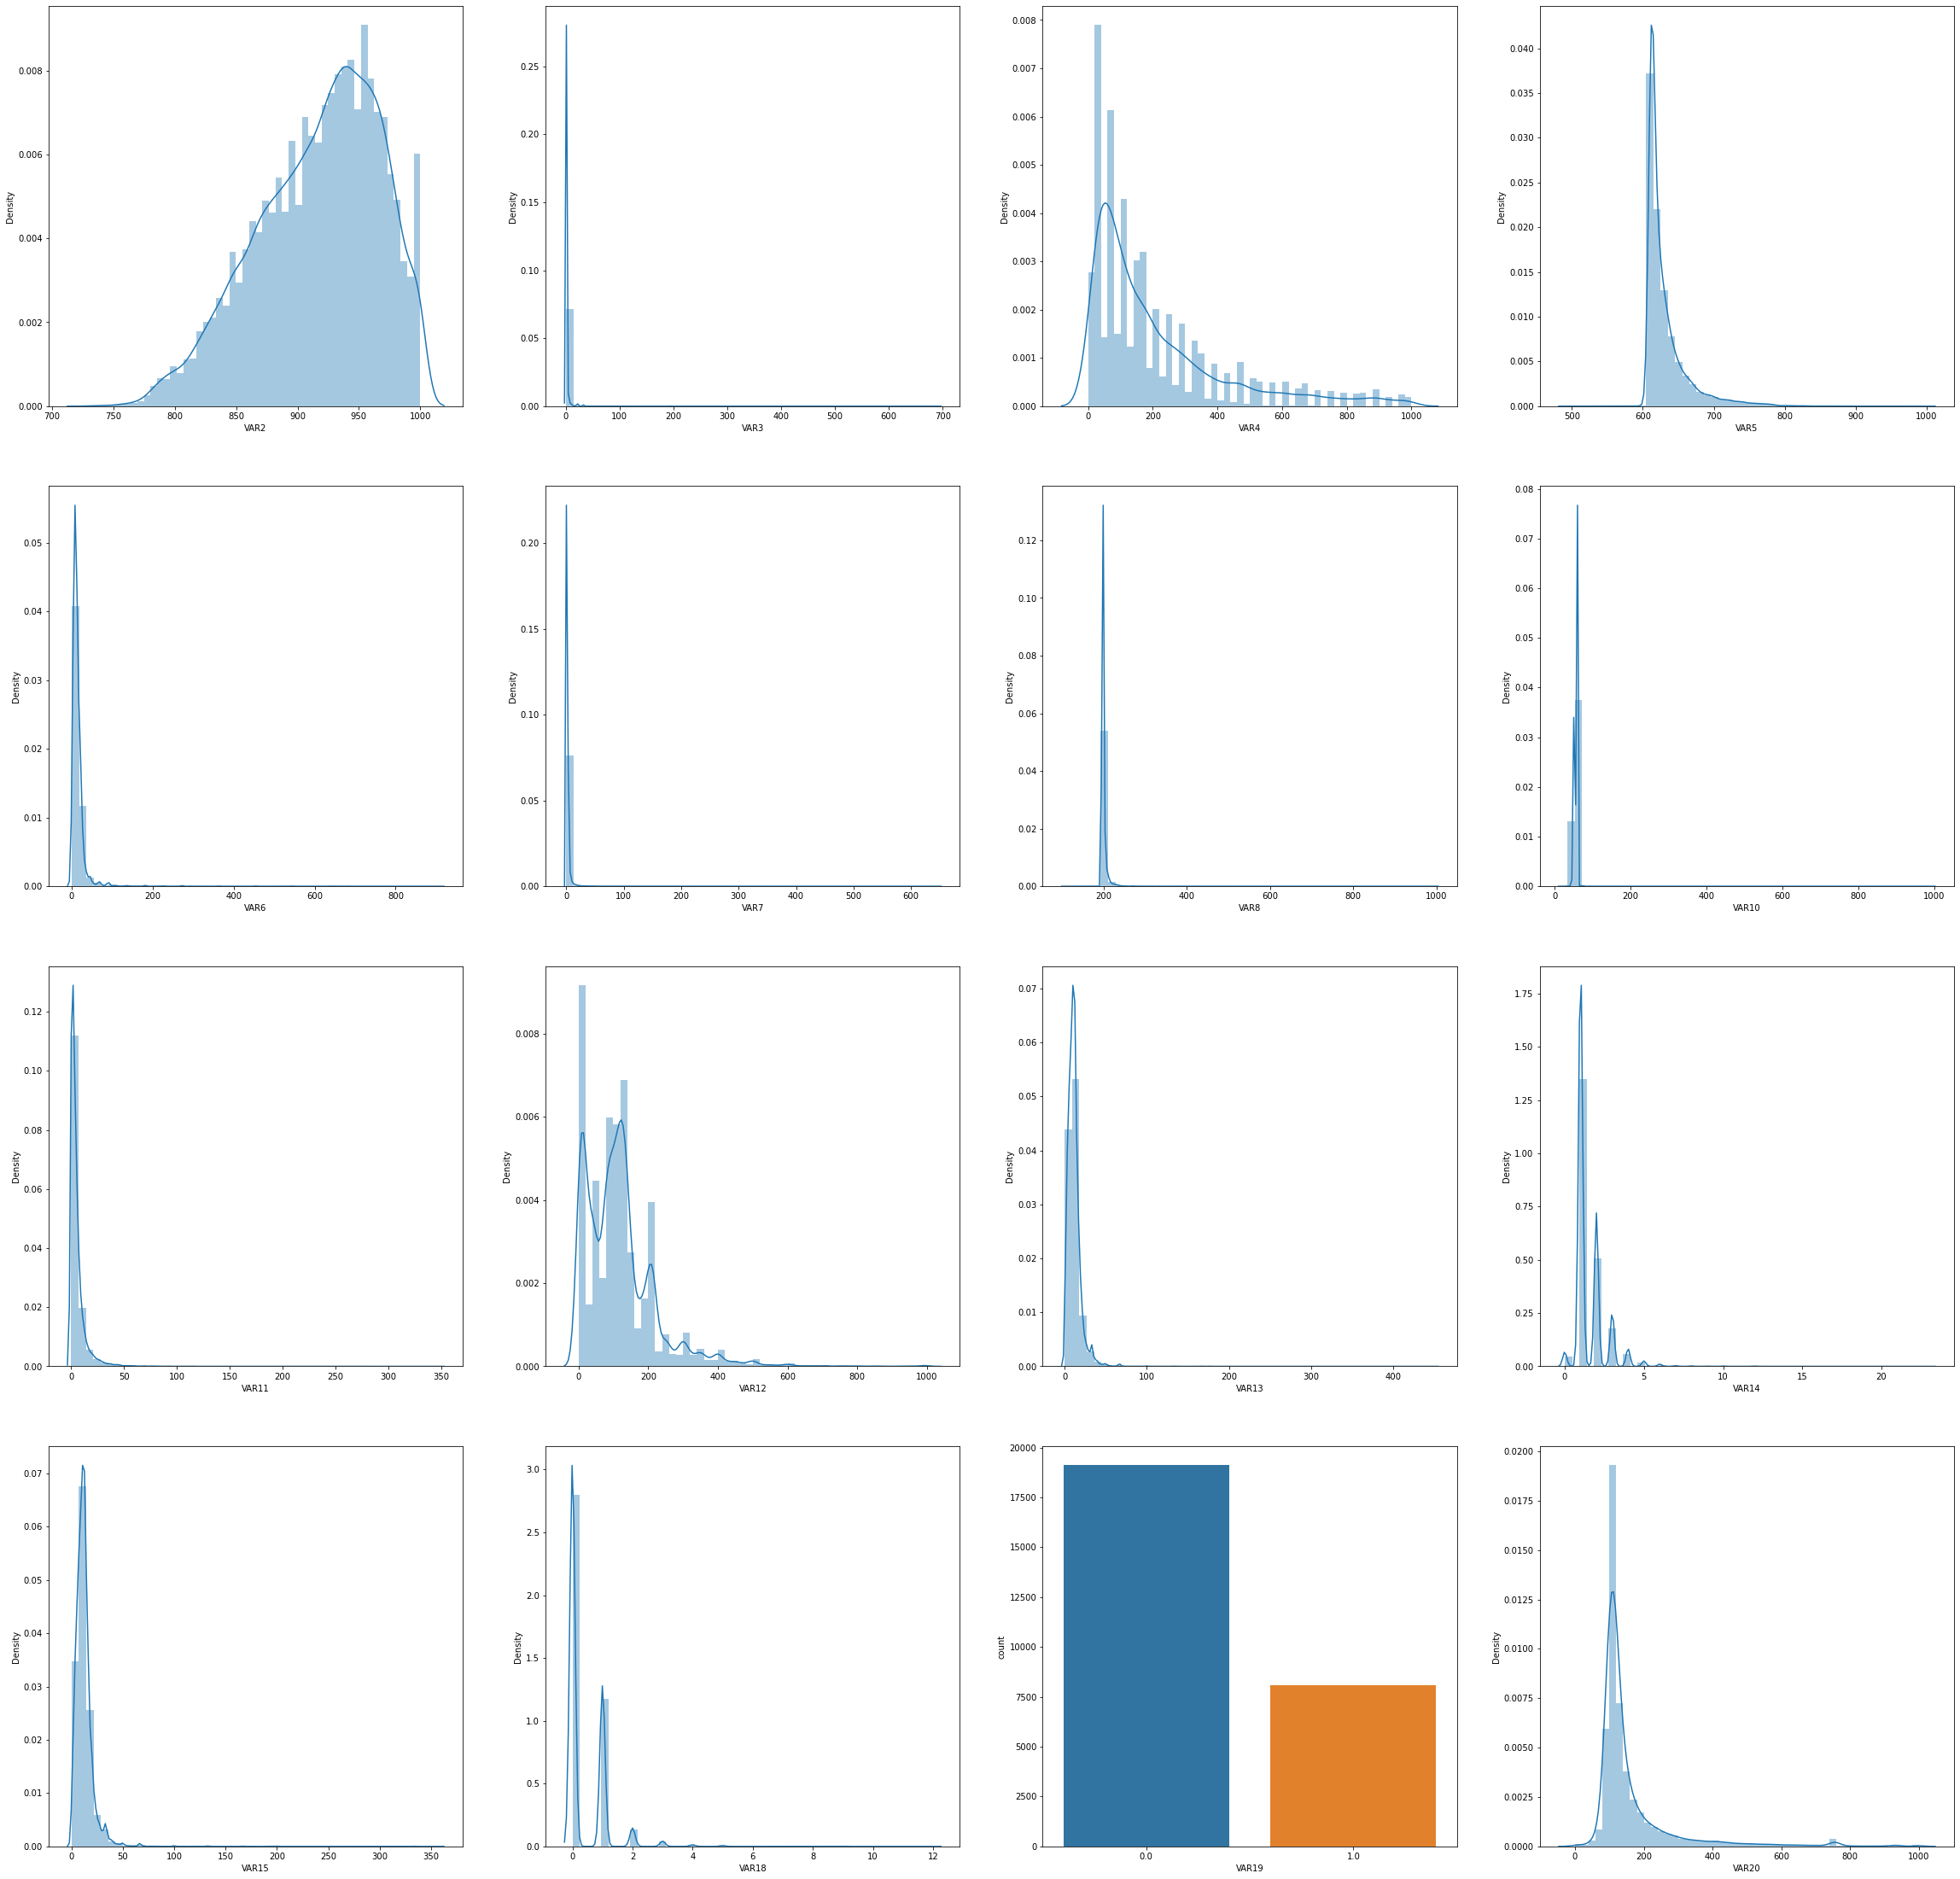

In [22]:
fig = plt.figure(figsize=(40,50))
for i, col in enumerate(X_train_iter.columns):
    ax = fig.add_subplot(5, 4, i+1)
    if col not in categorical_features:
        sns.distplot(X_train_iter[col], ax = ax, label=col)
    else:
        sns.countplot(X_train_iter[col], ax=ax, label=col)

### >> Trying KNN imputer

In [20]:
from sklearn.impute import KNNImputer

KNN_imp = KNNImputer(n_neighbors=5)

KNN_imp.fit(X_train)

X_train_KNN = pd.DataFrame(KNN_imp.transform(X_train), index=X_train.index, columns = X_train.columns)

C:\Ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Futu

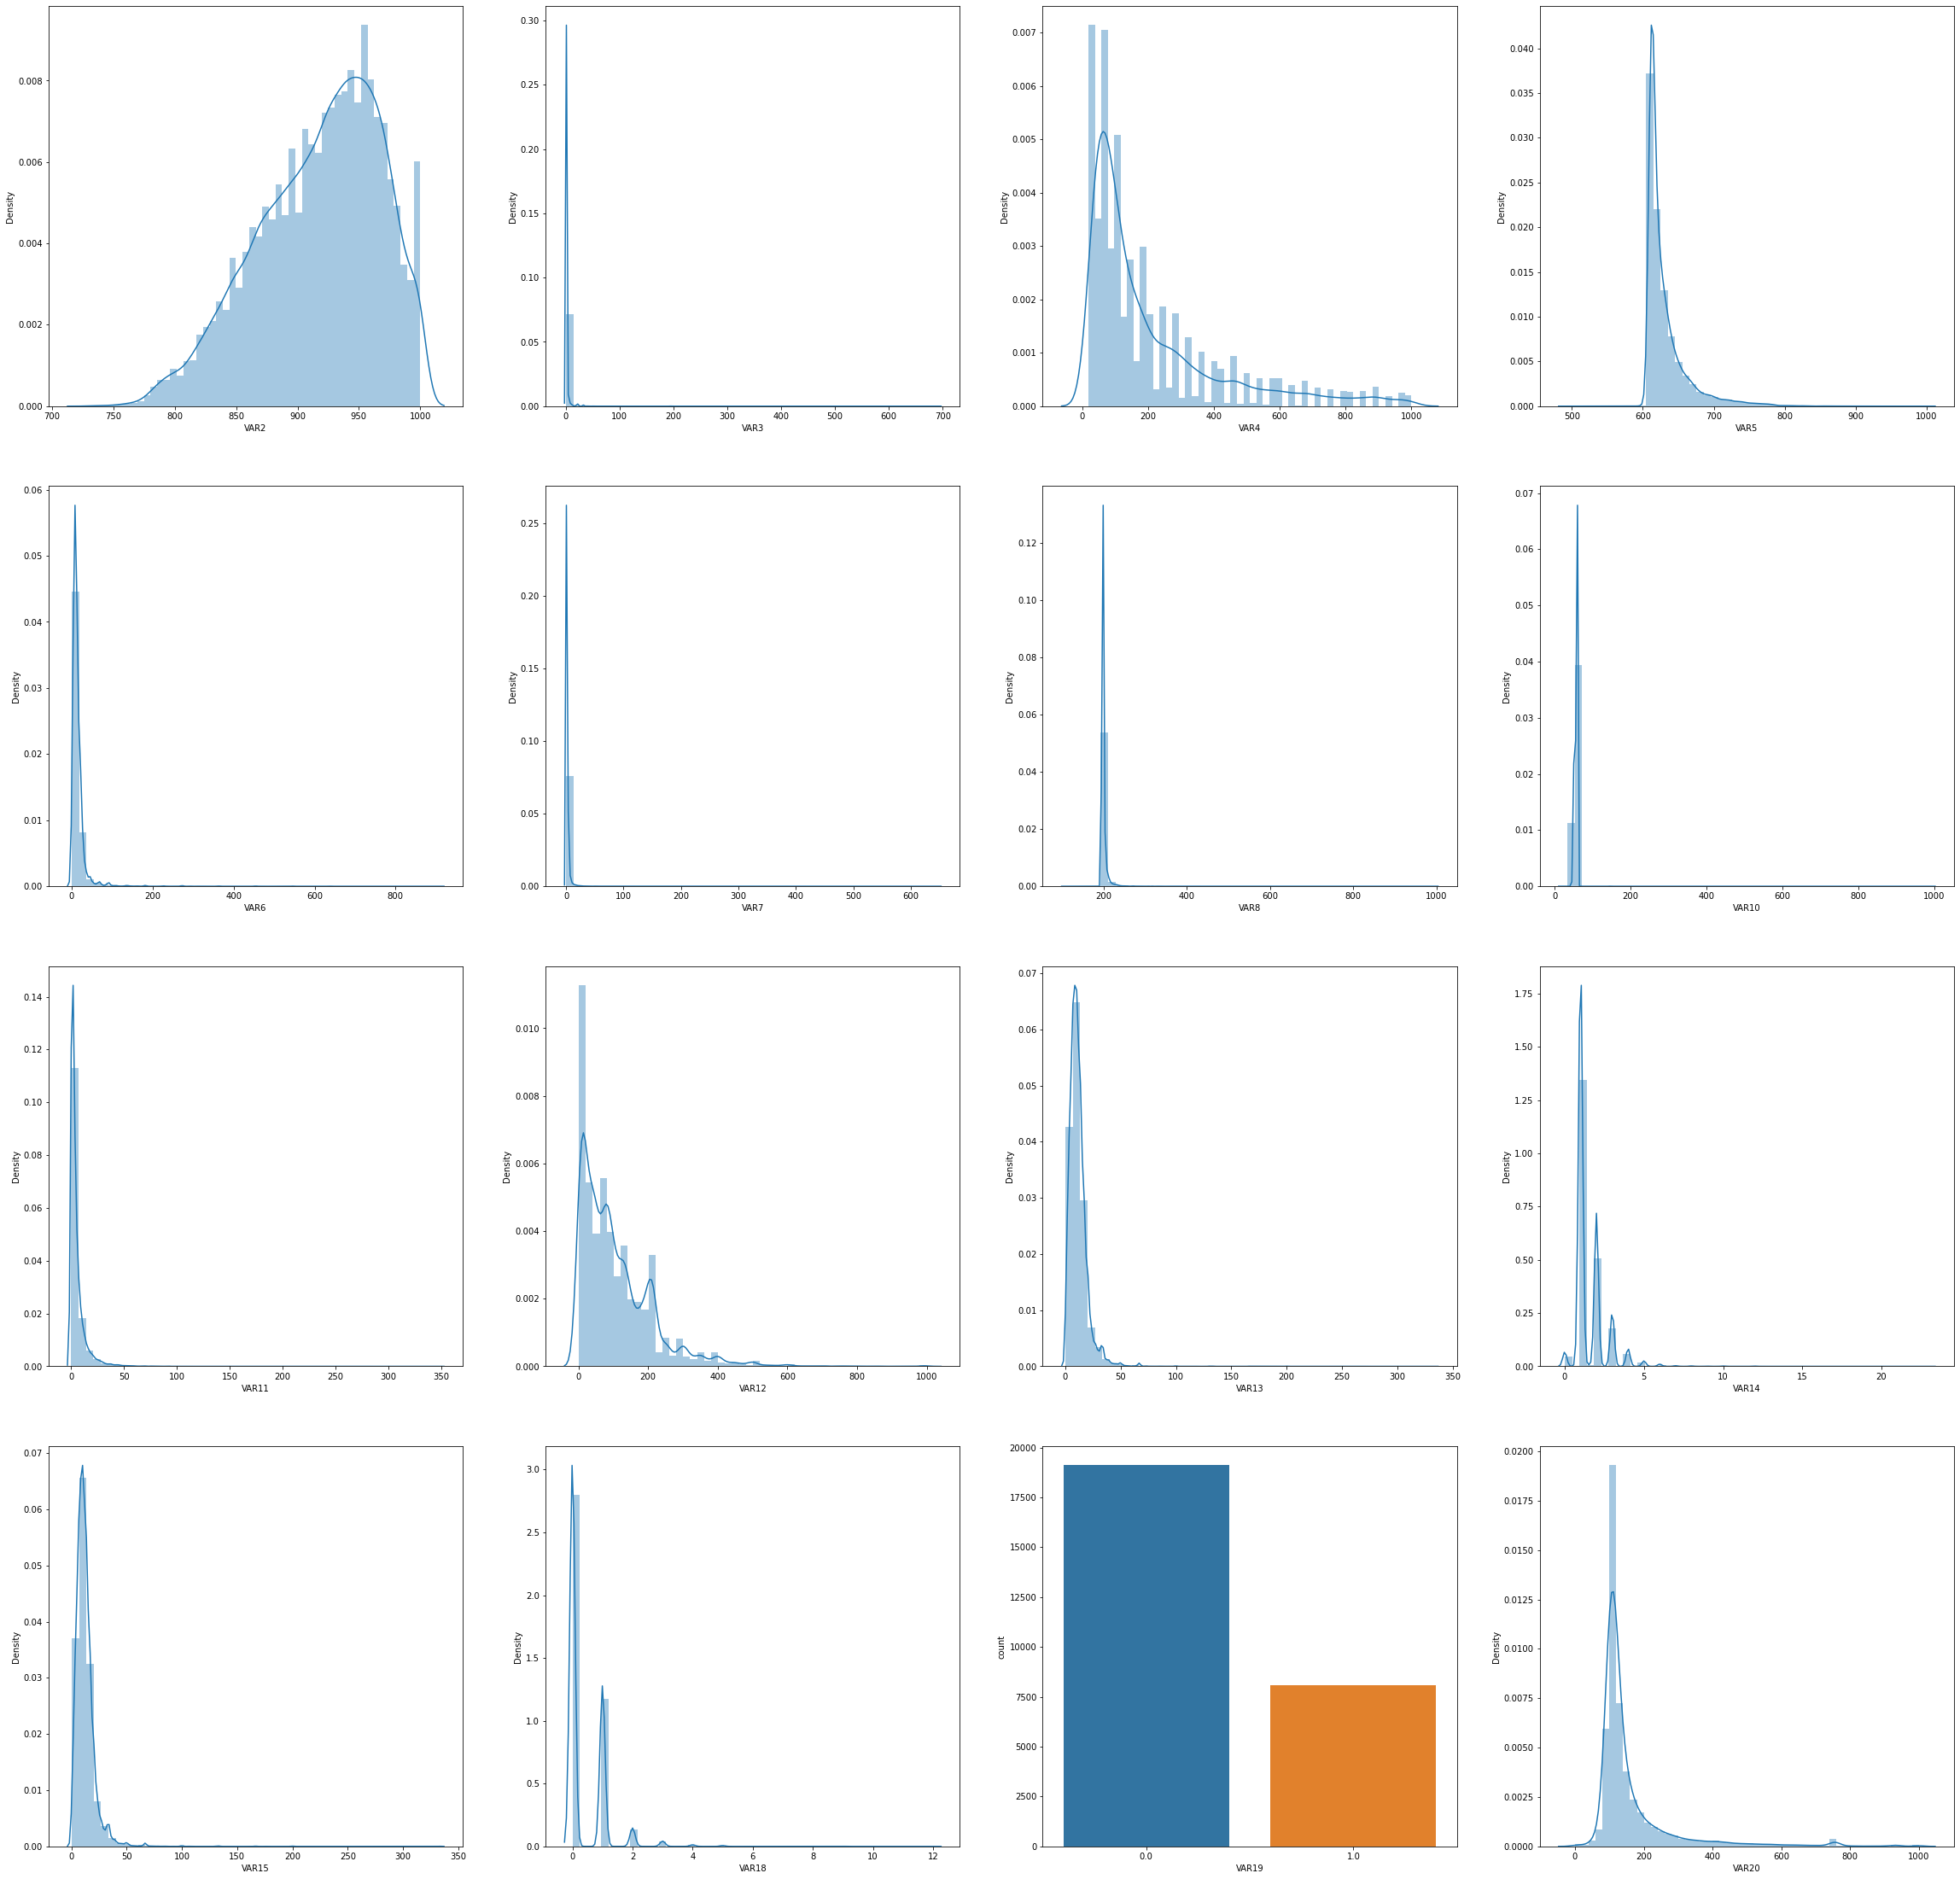

In [25]:
fig = plt.figure(figsize=(40,50))
for i, col in enumerate(X_train_KNN.columns):
    ax = fig.add_subplot(5, 4, i+1)
    if col not in categorical_features:
        sns.distplot(X_train_KNN[col], ax = ax, label=col)
    else:
        sns.countplot(X_train_KNN[col], ax=ax, x=col)

**VAR12 plot of the iterative imputer output is closer to normal distribution than that of KNNimputer. Let's proceed using iterative imputer.**

## > Pipeline function for exploration

In [12]:
def exploration_pipeline(df):
    # VAR14
    df['VAR14'].replace('.', np.nan, inplace = True)
    df['VAR14'] = pd.to_numeric(df['VAR14'])
    
    # Dropping VAR9, VAR17
    df.drop(columns = ["VAR9", "VAR17"], axis=1, inplace = True)

    # VAR1 as index
    df.set_index('VAR1', inplace=True)
    
    # Dropping VAR16
    df.drop(columns="VAR16", axis=1, inplace=True)
    
    # Imputer
    dft = df.drop(columns="VAR21", axis=1)
    dft = pd.DataFrame(iter_imp.transform(dft), index=dft.index, columns = dft.columns)
    
    return dft, df["VAR21"]

In [29]:
ytrain = train["VAR21"].replace({'Low':0, 'Medium':1, 'High':2})

# 4. Transformation

## >Label Encoding for VAR21

In [14]:
# For validation set
xval, yval = exploration_pipeline(val)

yval = yval.replace({'Low':0, 'Medium':1, 'High':2})

C:\Ana\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-12-ccbf5e6dabdb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VAR14'] = pd.to_numeric(df['VAR14'])
C:\Ana\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## >Scaling

In [24]:
from sklearn.preprocessing import PowerTransformer, RobustScaler

PT = PowerTransformer()
RS = RobustScaler()

In [16]:
# Trying Power Tranform
xtrain_pt = PT.fit_transform(X_train_iter)
xval_pt = PT.transform(xval)

C:\Ana\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [18]:
xtrain_pt

array([[ 0.98267109,  0.28343878, -0.33448082, ...,  1.70610633,
        -0.6504947 ,  0.95500488],
       [-0.10365894, -1.1417683 ,  0.82816791, ..., -0.69688312,
         1.53729155, -0.08133231],
       [ 1.04298169, -0.55842673, -0.24196327, ..., -0.69688312,
         1.53729155, -0.10402358],
       ...,
       [-1.13879755,  0.28343878,  0.22672574, ..., -0.69688312,
        -0.6504947 , -0.58848957],
       [ 1.29030234,  1.27116314, -2.42813844, ...,  1.39608401,
        -0.6504947 , -0.40065068],
       [ 0.66154505, -0.82788412, -0.99926472, ..., -0.69688312,
        -0.6504947 ,  0.658914  ]])

In [57]:
# Trying Robust Scaler
xtrain_rs = RS.fit_transform(X_train_iter)
xval_rs = RS.fit_transform(xval)

## >Trying SMOTE for imbalanced dataset

In [82]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 51)

xsmote, ysmote = sm.fit_resample(xtrain_pt, ytrain)

xsmote.shape

pd.Series(ysmote).value_counts()

0    14534
1    14534
2    14534
Name: VAR21, dtype: int64

- We have three training datasets, one from Power Transform one from Robust Scaler and one from PT+SMOTE

# 5. Model

In [21]:
# importing necessary models
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score

In [22]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='merror')
rf = RandomForestClassifier()
ifc = IsolationForest()
svc = SVC()

## > Output function

In [23]:
def print_results(clf, X_train, y_train, X_val, y_val):
    #print('Training classifier acc: ', clf.score(X_train.values, y_train.values))
    #print('Validation classifier acc: ', clf.score(X_val.values, y_val.values))
    train_pred = clf.predict(X_train)
    val_pred = clf.predict(X_val)
    print('Training accuracy score: ', accuracy_score(y_train, train_pred))
    print('Validation accuracy score: ', accuracy_score(y_val, val_pred))

### >> Trying XGBClassifier

In [63]:
xgb.fit(xtrain_pt, ytrain)
print("For Power Transform: ")
print_results(xgb, xtrain_pt, ytrain, xval_pt, yval)

[21:27:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For Power Transform: 
Training accuracy score:  0.7553324507208002
Validation accuracy score:  0.5777941176470588


In [66]:
xgb.fit(xtrain_rs, ytrain)
print("For Robust Scaler: ")
print_results(xgb, xtrain_pt, ytrain, xval_pt, yval)

[21:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For Robust Scaler: 
Training accuracy score:  0.5082009414533687
Validation accuracy score:  0.5045588235294117


In [85]:
xgb.fit(xsmote, ysmote)
print("For PT+SMOTE: ")
print_results(xgb, xsmote, ysmote, xval_pt, yval)

[21:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For PT+SMOTE: 
Training accuracy score:  0.7934039722948488
Validation accuracy score:  0.5466176470588235


### >> Trying with SVC

In [71]:
svc.fit(xtrain_pt, ytrain)
print("For Power Transform: ")
print_results(svc, xtrain_pt, ytrain, xval_pt, yval)

For Power Transform: 
Training accuracy score:  0.5873418652544866
Validation accuracy score:  0.5676470588235294


In [72]:
svc.fit(xtrain_rs, ytrain)
print("For Robust Scaler: ")
print_results(svc, xtrain_pt, ytrain, xval_pt, yval)

For Robust Scaler: 
Training accuracy score:  0.5462268314210061
Validation accuracy score:  0.5463235294117647


In [86]:
svc.fit(xsmote, ysmote)
print("For PT+SMOTE: ")
print_results(svc, xsmote, ysmote, xval_pt, yval)

For PT+SMOTE: 
Training accuracy score:  0.5632998486307967
Validation accuracy score:  0.45544117647058824


### >> Trying Isolation Forest

In [74]:
ifc.fit(xtrain_pt, ytrain)
print("For Power Transform: ")
print_results(ifc, xtrain_pt, ytrain, xval_pt, yval)

For Power Transform: 
Training accuracy score:  0.44263018534863197
Validation accuracy score:  0.4389705882352941


In [75]:
ifc.fit(xtrain_rs, ytrain)
print("For Robust Scaler: ")
print_results(ifc, xtrain_pt, ytrain, xval_pt, yval)

For Robust Scaler: 
Training accuracy score:  0.5300456016475434
Validation accuracy score:  0.529264705882353


In [87]:
ifc.fit(xsmote, ysmote)
print("For PT+SMOTE: ")
print_results(ifc, xsmote, ysmote, xval_pt, yval)

For PT+SMOTE: 
Training accuracy score:  0.2666620797211137
Validation accuracy score:  0.425


### >> Trying RandomForestClassifier

In [76]:
rf.fit(xtrain_pt, ytrain)
print("For Power Transform: ")
print_results(rf, xtrain_pt, ytrain, xval_pt, yval)

For Power Transform: 
Training accuracy score:  1.0
Validation accuracy score:  0.5727941176470588


In [77]:
rf.fit(xtrain_rs, ytrain)
print("For Robust Scaler: ")
print_results(rf, xtrain_pt, ytrain, xval_pt, yval)

For Robust Scaler: 
Training accuracy score:  0.5690276551927037
Validation accuracy score:  0.5351470588235294


In [88]:
rf.fit(xsmote, ysmote)
print("For PT+SMOTE: ")
print_results(rf, xsmote, ysmote, xval_pt, yval)

For PT+SMOTE: 
Training accuracy score:  1.0
Validation accuracy score:  0.5279411764705882


## Observations
- XGBClassifier works best with Power Transformer but slightly overfits
- Random Forest with Power Transformer highly overfits
- SVC with Robust Scaler underfits

# 6. Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

params = {
        'learning_rate': [0.03, 0.06, 0.1],
        'min_child_weight': [1, 5, 2],
        'gamma': [0,1,3],
        'subsample': [0.5,1],
        'max_depth': [3,6]
        }

xgb = XGBClassifier(use_label_encoder=False, eval_metric = 'merror')
gridsearch = GridSearchCV(xgb, param_grid=params, scoring='accuracy', n_jobs=1, cv=3, verbose=2)

In [104]:
gridsearch.fit(xtrain_pt, ytrain)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=1, subsample=0.5; total time=   2.1s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=1, subsample=0.5; total time=   2.1s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=1, subsample=0.5; total time=   2.2s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=1, subsample=1; total time=   2.2s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=1, subsample=1; total time=   2.3s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=1, subsample=1; total time=   2.1s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=5, subsample=0.5; total time=   2.2s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=5, subsample=0.5; total time=   2.2s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=5, subsample=0.5; total time=   2.2

[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=0.5; total time=   2.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=0.5; total time=   2.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=1; total time=   2.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=1; total time=   2.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=1; total time=   2.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, subsample=0.5; total time=   2.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, subsample=0.5; total time=   2.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, subsample=0.5; total time=   2.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, subsample=1; total time=   2.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, su

[CV] END gamma=1, learning_rate=0.06, max_depth=3, min_child_weight=2, subsample=1; total time=   2.3s
[CV] END gamma=1, learning_rate=0.06, max_depth=3, min_child_weight=2, subsample=1; total time=   2.3s
[CV] END gamma=1, learning_rate=0.06, max_depth=3, min_child_weight=2, subsample=1; total time=   2.3s
[CV] END gamma=1, learning_rate=0.06, max_depth=6, min_child_weight=1, subsample=0.5; total time=   4.3s
[CV] END gamma=1, learning_rate=0.06, max_depth=6, min_child_weight=1, subsample=0.5; total time=   4.3s
[CV] END gamma=1, learning_rate=0.06, max_depth=6, min_child_weight=1, subsample=0.5; total time=   4.4s
[CV] END gamma=1, learning_rate=0.06, max_depth=6, min_child_weight=1, subsample=1; total time=   4.8s
[CV] END gamma=1, learning_rate=0.06, max_depth=6, min_child_weight=1, subsample=1; total time=   4.8s
[CV] END gamma=1, learning_rate=0.06, max_depth=6, min_child_weight=1, subsample=1; total time=   4.8s
[CV] END gamma=1, learning_rate=0.06, max_depth=6, min_child_weight

[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=1, subsample=1; total time=   4.9s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=5, subsample=0.5; total time=   4.3s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=5, subsample=0.5; total time=   4.3s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=5, subsample=0.5; total time=   4.3s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=5, subsample=1; total time=   4.8s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=5, subsample=1; total time=   4.8s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=5, subsample=1; total time=   4.8s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=2, subsample=0.5; total time=   4.4s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=2, subsample=0.5; total time=   4.4s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_we

[CV] END gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=2, subsample=0.5; total time=   4.3s
[CV] END gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=2, subsample=0.5; total time=   4.3s
[CV] END gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=2, subsample=1; total time=   4.7s
[CV] END gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=2, subsample=1; total time=   4.6s
[CV] END gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=2, subsample=1; total time=   4.7s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                    

In [105]:
print("For Power Transform: ")
print_results(gridsearch, xtrain_pt, ytrain, xval_pt, yval)

For Power Transform: 
Training accuracy score:  0.6110253015592821
Validation accuracy score:  0.5801470588235295


# 7. Saving Model

In [108]:
import pickle as pkl

pkl.dump(gridsearch, open('xbgtuned.sav', 'wb'))

# 8. Miscellaneous

## Undersampling + Oversampling

In [ ]:
from sklearn.utils import resample

# Combing X and y into one
X = pd.concat([X_train, ytrain], axis=1)

# Generating different samples
high_samples = X[X['VAR21']==2]
med_samples = X[X['VAR21']==1]
low_samples = X[X['VAR21']==0]

print(X['VAR21'].value_counts())

high_upsampled = resample(high_samples,
                          replace=True, # sample with replacement
                          n_samples=6000, # match number in majority class
                          random_state=51) # reproducible results

med_downsampled = resample(med_samples,
                          replace=False, # sample with replacement
                          n_samples=10000, # match number in majority class
                          random_state=51) # reproducible results

low_downsampled = resample(low_samples,
                          replace=False, # sample with replacement
                          n_samples=6000, # match number in majority class
                          random_state=51) # reproducible results 

print(len(med_downsampled))
print(len(high_upsampled))
print(len(low_downsampled))

X_sampled = pd.concat([med_downsampled, high_upsampled, low_downsampled])
y_sampled = X_sampled['VAR21']
X_sampled.drop(['VAR21'], axis=1, inplace=True)

print(X_sampled.shape)

print(y_sampled.shape)

In [26]:
PT2 = PowerTransformer()

X_sampled_pt2 = PT2.fit_transform(X_sampled)
xval_pt2 = PT2.transform(xval)

C:\Ana\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [27]:
xgb.fit(X_sampled_pt2, y_sampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [28]:
print_results(xgb, X_sampled_pt2, y_sampled, xval_pt2, yval)

Training accuracy score:  0.8066818181818182
Validation accuracy score:  0.5395588235294118


In [41]:
rf.fit(X_sampled_pt2, y_sampled)
print_results(xgb, X_sampled_pt2, y_sampled, xval_pt2, yval)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [33]:
gridsearch.fit(X_sampled_pt2, y_sampled)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=1, subsample=0.5; total time=   3.4s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=1, subsample=0.5; total time=   4.0s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=1, subsample=0.5; total time=   3.7s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=1, subsample=1; total time=   3.8s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=1, subsample=1; total time=   3.8s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=1, subsample=1; total time=   3.9s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=5, subsample=0.5; total time=   3.8s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=5, subsample=0.5; total time=   3.6s
[CV] END gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=5, subsample=0.5; total time=   3.5

[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=0.5; total time=   2.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=0.5; total time=   2.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=1; total time=   2.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=1; total time=   2.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=1; total time=   2.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, subsample=0.5; total time=   2.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, subsample=0.5; total time=   2.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, subsample=0.5; total time=   2.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, subsample=1; total time=   2.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, su

[CV] END gamma=1, learning_rate=0.06, max_depth=3, min_child_weight=2, subsample=1; total time=   2.4s
[CV] END gamma=1, learning_rate=0.06, max_depth=3, min_child_weight=2, subsample=1; total time=   2.4s
[CV] END gamma=1, learning_rate=0.06, max_depth=3, min_child_weight=2, subsample=1; total time=   2.4s
[CV] END gamma=1, learning_rate=0.06, max_depth=6, min_child_weight=1, subsample=0.5; total time=   3.9s
[CV] END gamma=1, learning_rate=0.06, max_depth=6, min_child_weight=1, subsample=0.5; total time=   3.9s
[CV] END gamma=1, learning_rate=0.06, max_depth=6, min_child_weight=1, subsample=0.5; total time=   3.9s
[CV] END gamma=1, learning_rate=0.06, max_depth=6, min_child_weight=1, subsample=1; total time=   4.9s
[CV] END gamma=1, learning_rate=0.06, max_depth=6, min_child_weight=1, subsample=1; total time=   4.9s
[CV] END gamma=1, learning_rate=0.06, max_depth=6, min_child_weight=1, subsample=1; total time=   4.8s
[CV] END gamma=1, learning_rate=0.06, max_depth=6, min_child_weight

[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=1, subsample=1; total time=   5.0s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=5, subsample=0.5; total time=   3.9s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=5, subsample=0.5; total time=   3.9s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=5, subsample=0.5; total time=   3.9s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=5, subsample=1; total time=   4.9s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=5, subsample=1; total time=   5.0s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=5, subsample=1; total time=   4.9s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=2, subsample=0.5; total time=   3.9s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_weight=2, subsample=0.5; total time=   3.9s
[CV] END gamma=3, learning_rate=0.03, max_depth=6, min_child_we

[CV] END gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=2, subsample=0.5; total time=   3.9s
[CV] END gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=2, subsample=0.5; total time=   3.9s
[CV] END gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=2, subsample=1; total time=   4.8s
[CV] END gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=2, subsample=1; total time=   4.9s
[CV] END gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=2, subsample=1; total time=   4.8s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                    

In [34]:
gridsearch.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'subsample': 0.5}

In [35]:
print_results(gridsearch, xtrain_pt, ytrain, xval_pt, yval)

Training accuracy score:  0.562150632538982
Validation accuracy score:  0.5477941176470589


In [36]:
rf_params = {
                'n_estimators': [100, 200, 300],
                'max_depth': [5, 10, None],
                'min_samples_split' : [2,5],
                'max_features': [0.5, 'auto']
}

In [37]:
gridsearch_rf = GridSearchCV(rf, param_grid=rf_params, scoring='accuracy', n_jobs=1, cv=3, verbose=2)

In [38]:
gridsearch_rf.fit(xtrain_pt, ytrain)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=5, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=5, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=5, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=5, max_features=0.5, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END max_depth=5, max_features=0.5, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END max_depth=5, max_features=0.5, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END max_depth=5, max_features=0.5, min_samples_split=2, n_estimators=300; total time=   6.6s
[CV] END max_depth=5, max_features=0.5, min_samples_split=2, n_estimators=300; total time=   6.7s
[CV] END max_depth=5, max_features=0.5, min_samples_split=2, n_estimators=300; total time=   6.7s
[CV] END max_depth=5, max_features=0.5, min_samples_spli

[CV] END max_depth=None, max_features=0.5, min_samples_split=5, n_estimators=100; total time=   6.8s
[CV] END max_depth=None, max_features=0.5, min_samples_split=5, n_estimators=100; total time=   7.0s
[CV] END max_depth=None, max_features=0.5, min_samples_split=5, n_estimators=200; total time=  13.8s
[CV] END max_depth=None, max_features=0.5, min_samples_split=5, n_estimators=200; total time=  14.1s
[CV] END max_depth=None, max_features=0.5, min_samples_split=5, n_estimators=200; total time=  13.9s
[CV] END max_depth=None, max_features=0.5, min_samples_split=5, n_estimators=300; total time=  20.6s
[CV] END max_depth=None, max_features=0.5, min_samples_split=5, n_estimators=300; total time=  21.2s
[CV] END max_depth=None, max_features=0.5, min_samples_split=5, n_estimators=300; total time=  20.9s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total t

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [39]:
gridsearch_rf.best_params_

{'max_depth': 10,
 'max_features': 0.5,
 'min_samples_split': 5,
 'n_estimators': 200}

In [40]:
print("For Power Transform: ")
print_results(gridsearch_rf, xtrain_pt, ytrain, xval_pt, yval)

For Power Transform: 
Training accuracy score:  0.650853192115328
Validation accuracy score:  0.5795588235294118
